# E Commerce Customer Churn Use Case Overview
The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

## Prerequsites

In [1]:
# akses ke direktori drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) #  Customer Churn Prediction 
# %cd /content/gdrive/My\ Drive/Colab\ Notebooks/Data\ Science\ Practice/Customer\ Churn\ Prediction/
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Data\ Science\ Practice/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Data Science Practice


In [2]:
# import standard library for every data proje
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Variable Discerption
-  `CustomerID`, Unique customer ID
- `Churn`, Churn Flag
- `Tenure`, Tenure of customer in organization
- `PreferredLoginDevice`, Preferred login device of customer
- `CityTier`, City tier
- `WarehouseToHome`, Distance in between warehouse to home of customer
- `PreferredPaymentMode`, Preferred payment method of customer
- `Gender`, Gender of customer
- `HourSpendOnApp`, Number of hours spend on mobile application or website
- `NumberOfDeviceRegistered`, Total number of deceives is registered on particular customer
- `PreferedOrderCat`, Preferred order category of customer in last month
- `SatisfactionScore`, Satisfactory score of customer on service
- `MaritalStatus`, Marital status of customer
- `NumberOfAddress`, Total number of added added on particular customer
- `Complain`, Any complaint has been raised in last month
- `OrderAmountHikeFromlastYear`, Percentage increases in order from last year
- `CouponUsed`, Total number of coupon has been used in last month
- `OrderCount`, Total number of orders has been places in last month
- `DaySinceLastOrder`, Day Since last order by customer
- `CashbackAmount`, Average cashback in last month

In [3]:
ecom_cust_df = pd.read_csv('e_commerce_dataset.csv')
ecom_cust_df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [4]:
# cek jumlah baris dan kolomnya
ecom_cust_df.shape

(5630, 20)

In [5]:
# check deskriptif statistiknya
ecom_cust_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [6]:
# check deskriptif statistiknya
ecom_cust_df.describe(include=[object])

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Membagi data antara data yang digunakan pada modelling dan Contoh Data Asli sebagai Real Use Case

In [71]:
# dataframe for sample use case
usecase_df = ecom_cust_df.loc[:4030,]
# dataframe for real dataset
# pilih sisanya dari baris ke 4030 kebawah dan semua kolom kecuali churn
realcase_df = ecom_cust_df.loc[4030:, ecom_cust_df.columns != 'Churn']

## Data Inspection

In [72]:
# check info dataasetnya
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4031 non-null   int64  
 1   Churn                        4031 non-null   int64  
 2   Tenure                       4031 non-null   float64
 3   PreferredLoginDevice         4031 non-null   object 
 4   CityTier                     4031 non-null   int64  
 5   WarehouseToHome              4031 non-null   float64
 6   PreferredPaymentMode         4031 non-null   object 
 7   Gender                       4031 non-null   object 
 8   HourSpendOnApp               4031 non-null   float64
 9   NumberOfDeviceRegistered     4031 non-null   int64  
 10  PreferedOrderCat             4031 non-null   object 
 11  SatisfactionScore            4031 non-null   int64  
 12  MaritalStatus                4031 non-null   object 
 13  NumberOfAddress   

In [73]:
# check jumlah baris dan kolom dari data usecase
usecase_df.shape

(4031, 20)

## Data Cleansing
Mulai menggunakan Data Use Case sepanjang projek

In [74]:
# check missing value 
usecase_df.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                          0
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                 0
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                  0
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    69
CouponUsed                     37
OrderCount                     52
DaySinceLastOrder              79
CashbackAmount                  0
dtype: int64

In [75]:
# check duplicate value
usecase_df[usecase_df.duplicated()].count()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Handling Missing Value
hanya terdapat missing value, tidak ada data duplicate

In [14]:
# lihat jumlah data kosong kemudian diurutkan
null_data = usecase_df.isnull().sum().sort_values(ascending=False)
null_data

Tenure                         264
HourSpendOnApp                 255
WarehouseToHome                251
CouponUsed                     168
OrderCount                     121
DaySinceLastOrder               94
OrderAmountHikeFromlastYear     88
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [ ]:
# melihat tipe data per baris dari tiap data kosong keatas
for i,row in null_data.head(10).iteritems():
    print(usecase_df[i].dtype)

float64
float64
float64
float64
float64
float64
float64
int64
object
int64


In [ ]:
null_numeric = ['Tenure','HourSpendOnApp','WarehouseToHome','CouponUsed', 'DaySinceLastOrder', 'OrderCount', 'OrderAmountHikeFromlastYear']

# semua kolom kosongnya itu numerik
for col in null_numeric:
    print(f"""{col}
max  : {usecase_df[col].max():.2f}
min  : {usecase_df[col].min():.2f}
mean : {usecase_df[col].mean():.2f}\n""")

Tenure
max  : 60.00
min  : 0.00
mean : 10.07

HourSpendOnApp
max  : 4.00
min  : 0.00
mean : 2.73

WarehouseToHome
max  : 126.00
min  : 5.00
mean : 15.40

CouponUsed
max  : 16.00
min  : 0.00
mean : 1.55

DaySinceLastOrder
max  : 46.00
min  : 0.00
mean : 4.35

OrderCount
max  : 16.00
min  : 1.00
mean : 2.83

OrderAmountHikeFromlastYear
max  : 26.00
min  : 11.00
mean : 15.50



Karena terlalu jauh rentangnya antara `min()` dan `max()` maka menggunakan mean

In [76]:
# null_numeric = ['Tenure','HourSpendOnApp','WarehouseToHome','CouponUsed', 'DaySinceLastOrder', 'OrderCount', 'OrderAmountHikeFromlastYear']

for i in usecase_df.columns:
    if usecase_df[i].isnull().sum() > 0:
        # fill missing value from mean calculation result
        usecase_df[i].fillna(usecase_df[i].mean(),inplace=True)
        # numeric_mean = usecase_df[col].mean()
        # usecase_df.fillna({col : numeric_mean}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [77]:
# check info data setelah missing value impuation 
usecase_df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [78]:
# check info dataset setelah missing value imputation
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4031 non-null   int64  
 1   Churn                        4031 non-null   int64  
 2   Tenure                       4031 non-null   float64
 3   PreferredLoginDevice         4031 non-null   object 
 4   CityTier                     4031 non-null   int64  
 5   WarehouseToHome              4031 non-null   float64
 6   PreferredPaymentMode         4031 non-null   object 
 7   Gender                       4031 non-null   object 
 8   HourSpendOnApp               4031 non-null   float64
 9   NumberOfDeviceRegistered     4031 non-null   int64  
 10  PreferedOrderCat             4031 non-null   object 
 11  SatisfactionScore            4031 non-null   int64  
 12  MaritalStatus                4031 non-null   object 
 13  NumberOfAddress   

In [18]:
# check deskripsi data setelah pengisian missing value
usecase_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.00000,3031.000000,3031.000000
mean,51516.000000,0.173540,9.925190,1.649291,15.170504,2.488112,3.269218,3.074893,3.789838,0.287694,15.299354,1.304576,2.60756,4.163432,166.546684
std,875.118659,0.378776,8.183609,0.914532,8.172262,0.563349,0.928876,1.361905,2.552881,0.452762,3.613747,1.782979,2.88331,3.611476,48.239765
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.00000,0.000000,0.000000
25%,50758.500000,0.000000,3.000000,1.000000,8.000000,2.000000,3.000000,2.000000,2.000000,0.000000,12.000000,0.000000,1.00000,2.000000,130.000000
50%,51516.000000,0.000000,9.925190,1.000000,14.000000,2.488112,3.000000,3.000000,3.000000,0.000000,14.000000,1.000000,1.00000,3.000000,151.000000
75%,52273.500000,0.000000,15.000000,3.000000,18.000000,3.000000,4.000000,4.000000,5.000000,1.000000,18.000000,1.304576,2.60756,7.000000,186.000000
max,53031.000000,1.000000,60.000000,3.000000,126.000000,4.000000,6.000000,5.000000,21.000000,1.000000,26.000000,15.000000,16.00000,46.000000,325.000000


In [19]:
usecase_df.drop(columns='CustomerID', axis=1, inplace=True)
usecase_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.00000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.92519,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.92519,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.00000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.00000,Phone,1,12.0,CC,Male,2.488112,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## Exploratory Data Analysis

In [ ]:
# view value counts of churns
usecase_df['Churn'].value_counts()

0    3334
1     697
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn')

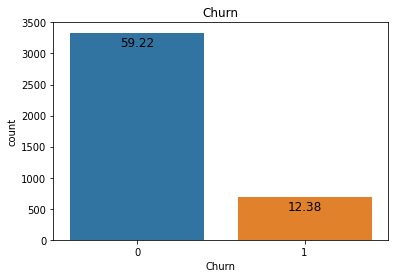

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=usecase_df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.title('Churn')

### Distribution of Numerical Features
menggunakan distplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see 

<Figure size 360x576 with 0 Axes>

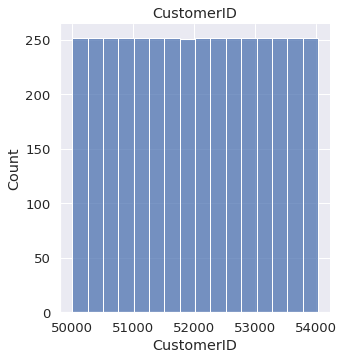

<Figure size 360x576 with 0 Axes>

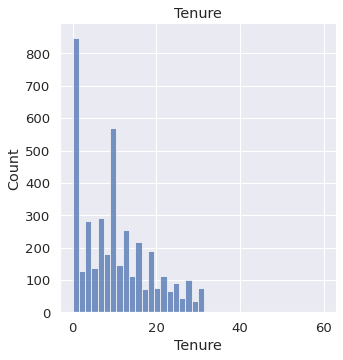

<Figure size 360x576 with 0 Axes>

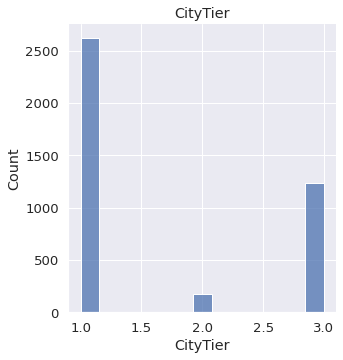

<Figure size 360x576 with 0 Axes>

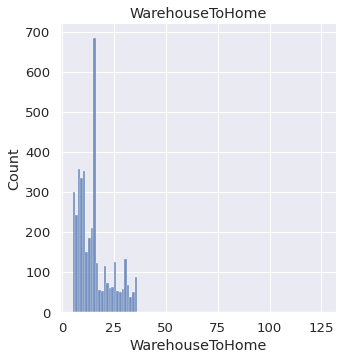

<Figure size 360x576 with 0 Axes>

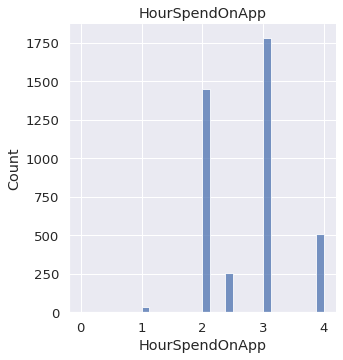

<Figure size 360x576 with 0 Axes>

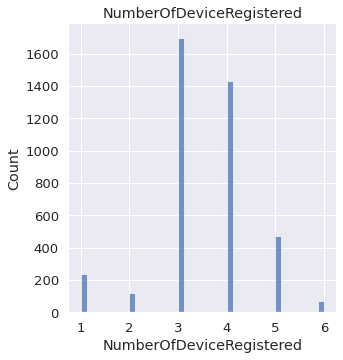

<Figure size 360x576 with 0 Axes>

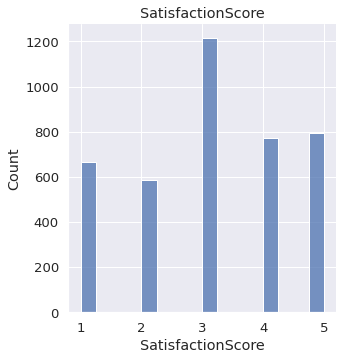

<Figure size 360x576 with 0 Axes>

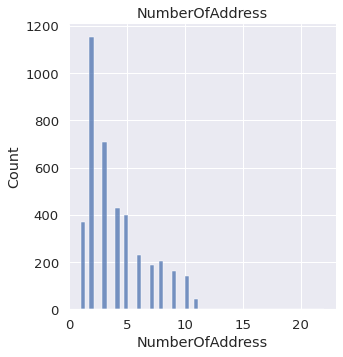

<Figure size 360x576 with 0 Axes>

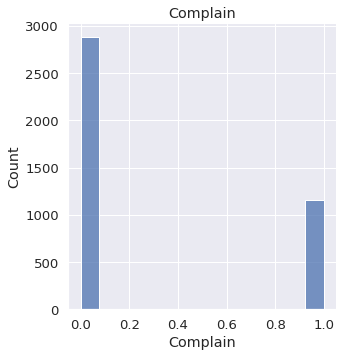

<Figure size 360x576 with 0 Axes>

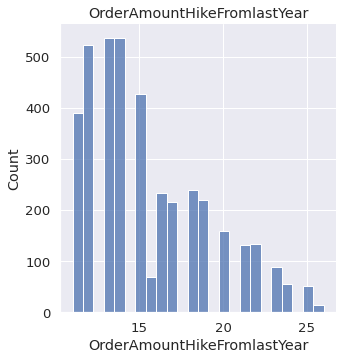

<Figure size 360x576 with 0 Axes>

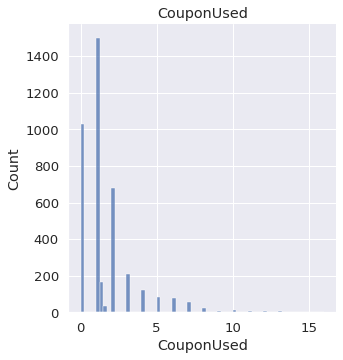

<Figure size 360x576 with 0 Axes>

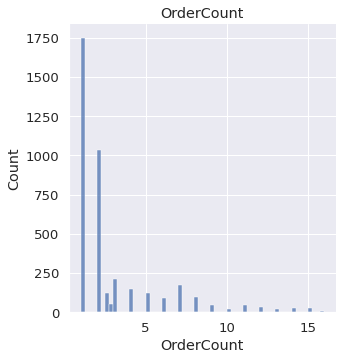

<Figure size 360x576 with 0 Axes>

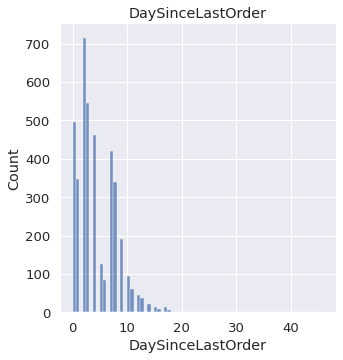

<Figure size 360x576 with 0 Axes>

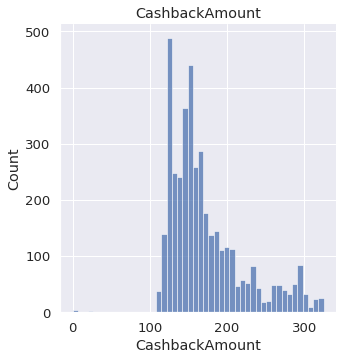

In [79]:
numeric_columns = [col for col in usecase_df.columns if usecase_df[col].dtype!='object' and col!='Churn']

# fig, axes = plt.subplots(7, 2, figsize=(24, 24))
# for i in range(7):
#     for j in range(2):
#       sns.histplot(usecase_df[numeric_columns[2*i+j]], ax=axes[i,j], kde=True)

# fig, ax = plt.subplots(8, 2, figsize=(20, 20))
# for i, subplot in zip(numeric_columns, ax.flatten()):
    # sns.distplot(usecase_df[i], ax=subplot)

for nucol in numeric_columns:
    # visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(5,8))
    # menggunakan distplot
    ax = sns.displot(x=nucol, data=usecase_df)
    plt.title(nucol)

### Distribution of Categorical Features

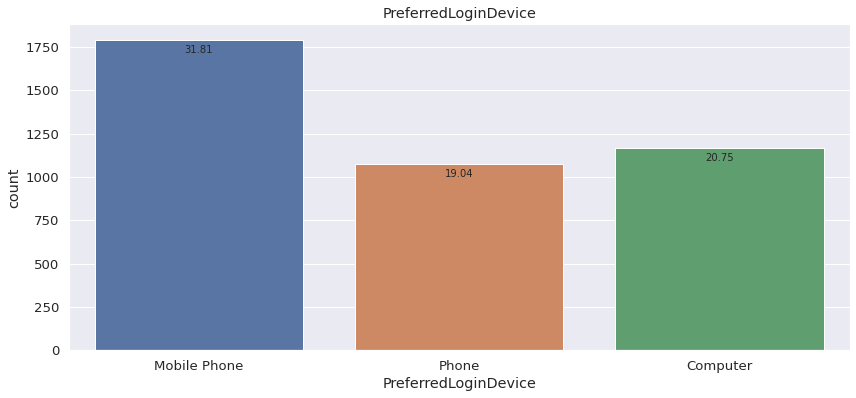

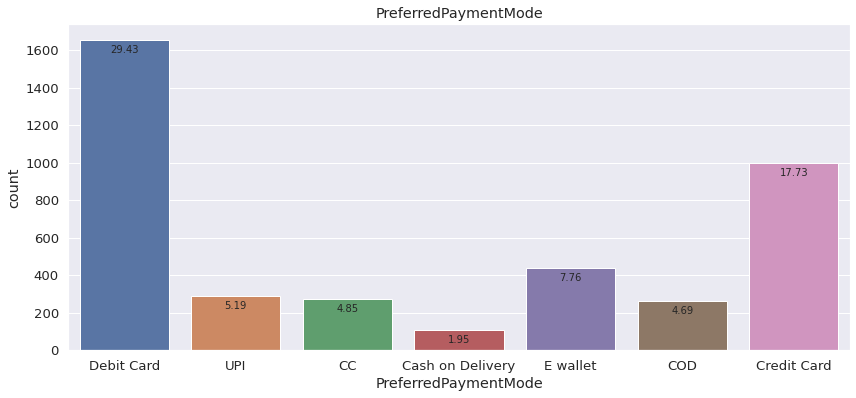

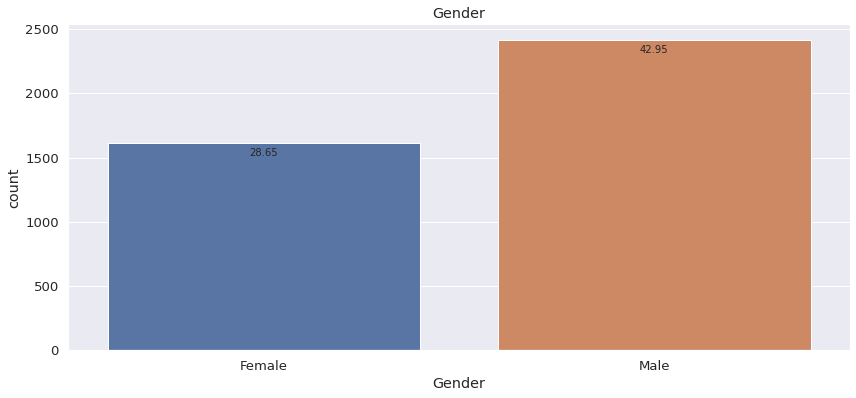

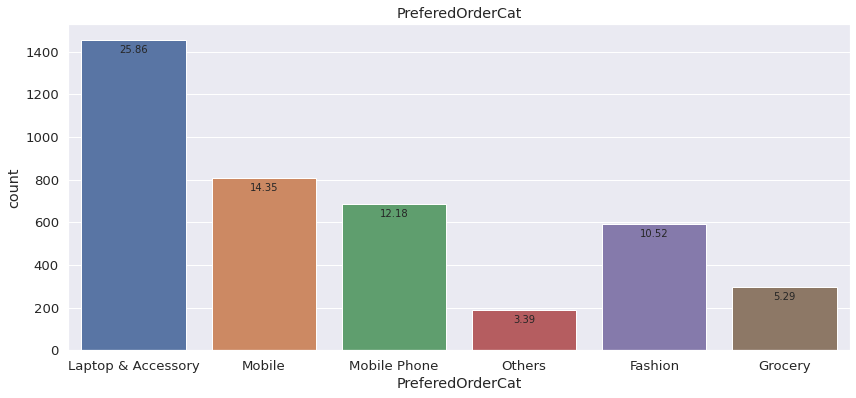

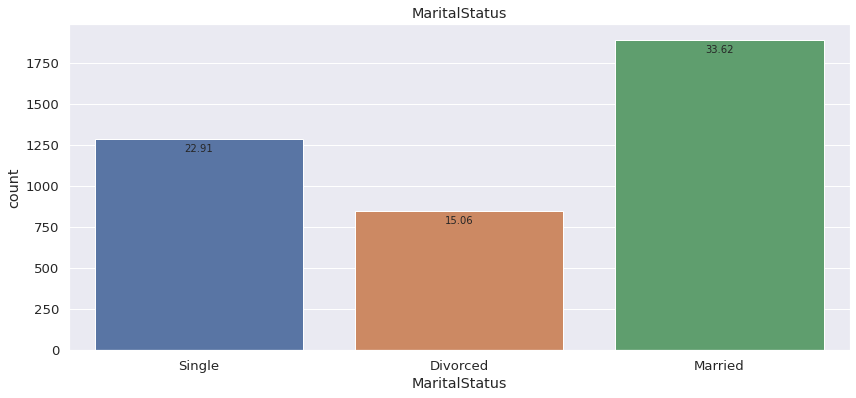

In [80]:
categ_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for cacol in categ_columns:
    # visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x=cacol, data=usecase_df)
    for a in ax.patches:
        ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                    ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
    plt.title(cacol)

### Univariate Analysis wit Categorical Features

In [21]:
# view object column
usecase_df.dtypes[usecase_df.dtypes=='object'].index

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [20]:
categ_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for cacol in categ_columns:
    print(f"""{cacol} unique values
{usecase_df[cacol].value_counts()} \n""")

PreferredLoginDevice unique values
Mobile Phone    1174
Phone            977
Computer         880
Name: PreferredLoginDevice, dtype: int64 

PreferredPaymentMode unique values
Debit Card          1243
Credit Card          688
E wallet             334
CC                   273
UPI                  215
COD                  197
Cash on Delivery      81
Name: PreferredPaymentMode, dtype: int64 

Gender unique values
Male      1829
Female    1202
Name: Gender, dtype: int64 

PreferedOrderCat unique values
Laptop & Accessory    1102
Mobile                 806
Fashion                447
Mobile Phone           314
Grocery                215
Others                 147
Name: PreferedOrderCat, dtype: int64 

MaritalStatus unique values
Married     1541
Single       969
Divorced     521
Name: MaritalStatus, dtype: int64 



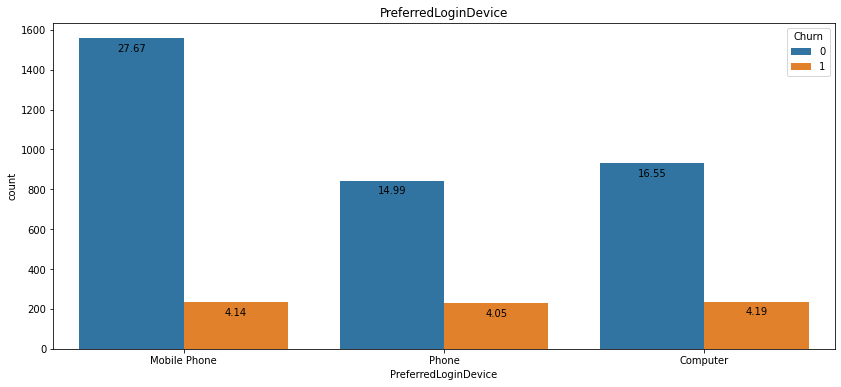

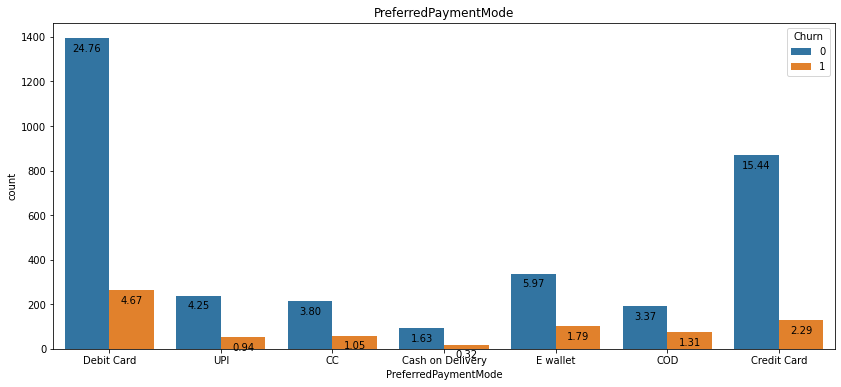

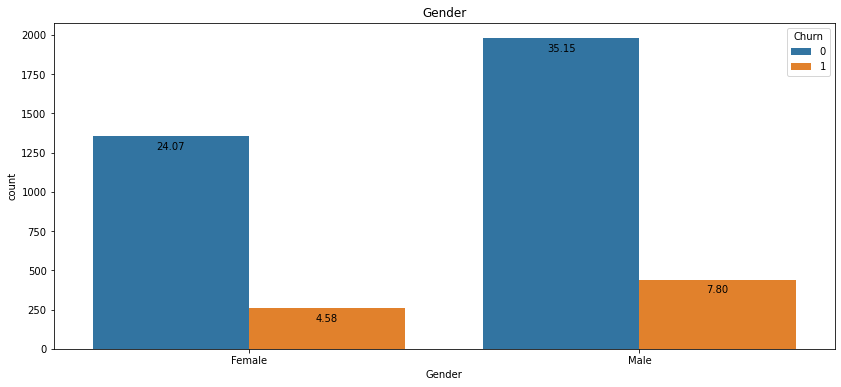

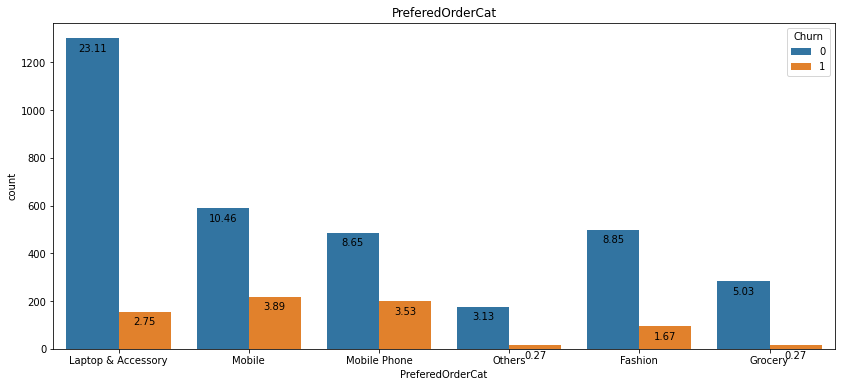

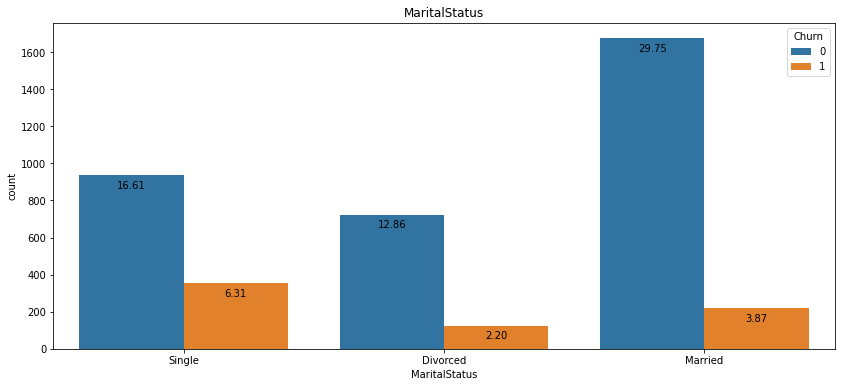

In [ ]:
categ_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for cacol in categ_columns:
    # visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x=cacol, data=usecase_df, hue='Churn')
    for a in ax.patches:
        ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                    ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
    plt.title(cacol)

### Univariate Analysis with Numeric Features
Korelasi antar Tenure dengan Churn

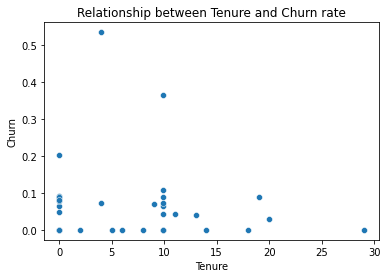

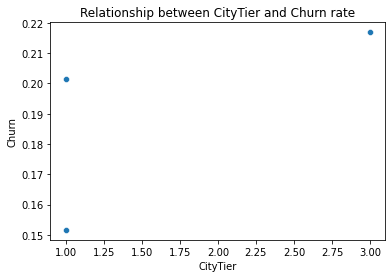

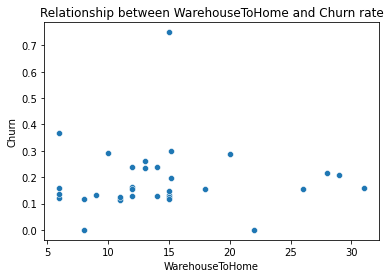

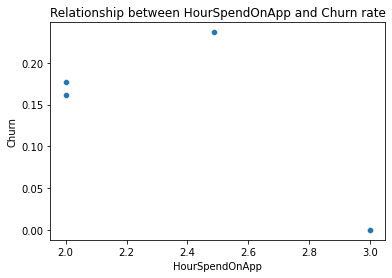

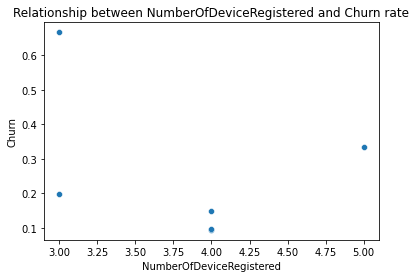

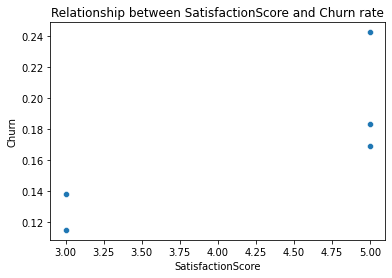

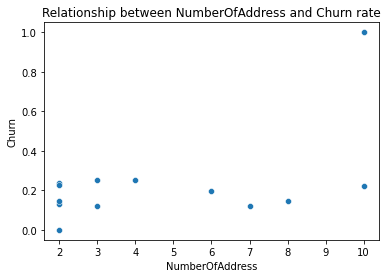

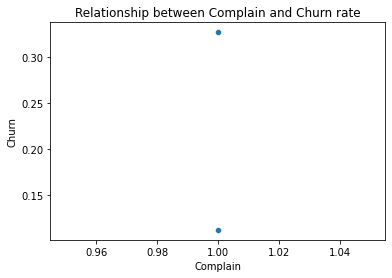

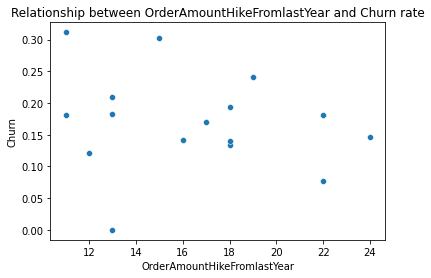

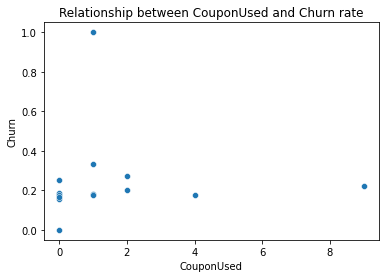

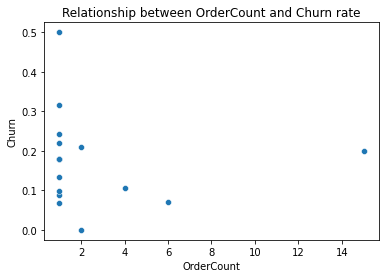

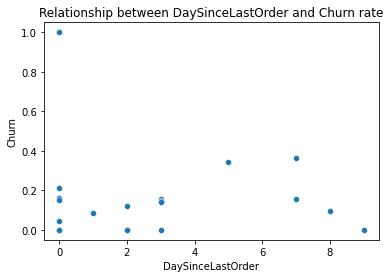

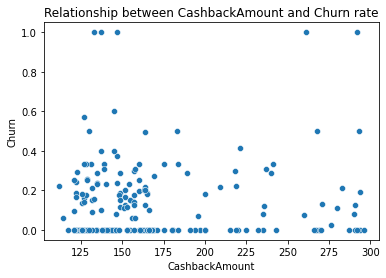

In [25]:
# corr_column = ['Tenure','OrderCount','CouponUsed']

for col in numeric_columns:
  # mencari korelasi antara tenure dengan Churn
  sns.scatterplot(x=usecase_df[col],y=usecase_df.groupby(col)['Churn'].mean())
  plt.title("Relationship between " + col +" and Churn rate")
  plt.show()

### Multivariate Analysis

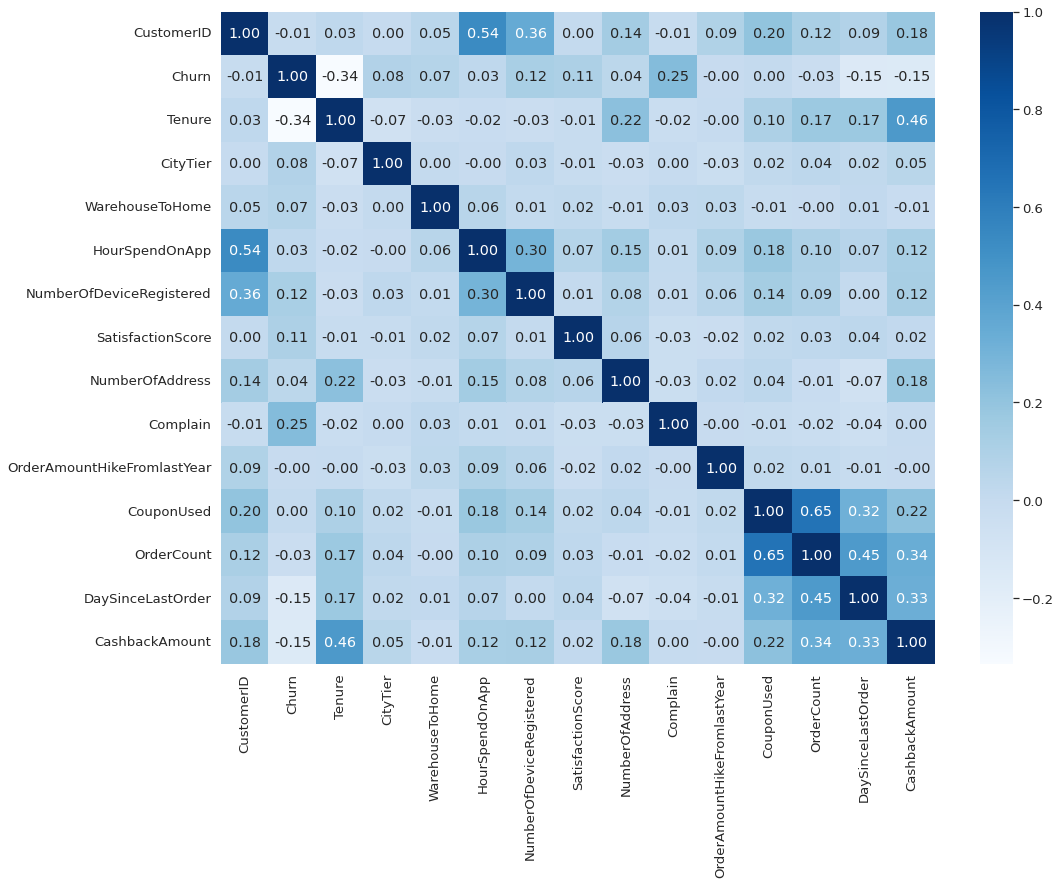

In [81]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(usecase_df.corr(), annot=True, 
            fmt='.2f', cmap='Blues')

## Data Preparation

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Categorical Encoding

In [82]:
label_encoder = LabelEncoder()

# encoding semua kolom kategorikal
for col in usecase_df.columns:
    # kalau kolom numerik, ga diapa2in
    if usecase_df[col].dtype == np.number:
        continue
    # kalau kolom kategorikal, encode dengan label encoder
    usecase_df[col] = label_encoder.fit_transform(usecase_df[col])

usecase_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,1,4.00000,1,2,6.0,4,0,3.000000,2,2,1,2,8,1,11.0,1.0,1.0,5.0,54
1,1,1,9.92519,2,0,8.0,6,1,3.000000,3,3,2,2,6,1,15.0,0.0,1.0,0.0,15
2,2,1,9.92519,2,0,30.0,4,1,2.000000,3,3,2,2,5,1,14.0,0.0,1.0,3.0,14
3,3,1,0.00000,2,2,15.0,4,1,2.000000,3,2,4,2,7,0,23.0,0.0,1.0,3.0,28
4,4,1,0.00000,2,0,12.0,0,1,2.488112,2,3,4,2,2,0,11.0,1.0,1.0,3.0,24


### Numerical Scaling

In [83]:
minmax_scaler = MinMaxScaler()

# for col in num_col:
for col in numeric_columns:
    usecase_df[col] = usecase_df[col].astype(float)
    usecase_df[[col]] = minmax_scaler.fit_transform(usecase_df[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [84]:
usecase_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.000000,1,0.066667,1,1.0,0.008264,4,0,0.750000,0.4,2,0.25,2,0.571429,1.0,0.000000,0.0625,0.0,0.108696,0.250000
1,0.000248,1,0.165420,2,0.0,0.024793,6,1,0.750000,0.6,3,0.50,2,0.428571,1.0,0.266667,0.0000,0.0,0.000000,0.069444
2,0.000496,1,0.165420,2,0.0,0.206612,4,1,0.500000,0.6,3,0.50,2,0.357143,1.0,0.200000,0.0000,0.0,0.065217,0.064815
3,0.000744,1,0.000000,2,1.0,0.082645,4,1,0.500000,0.6,2,1.00,2,0.500000,0.0,0.800000,0.0000,0.0,0.065217,0.129630
4,0.000993,1,0.000000,2,0.0,0.057851,0,1,0.622028,0.4,3,1.00,2,0.142857,0.0,0.000000,0.0625,0.0,0.065217,0.111111


### Multivariate Correlation with Entire Columns

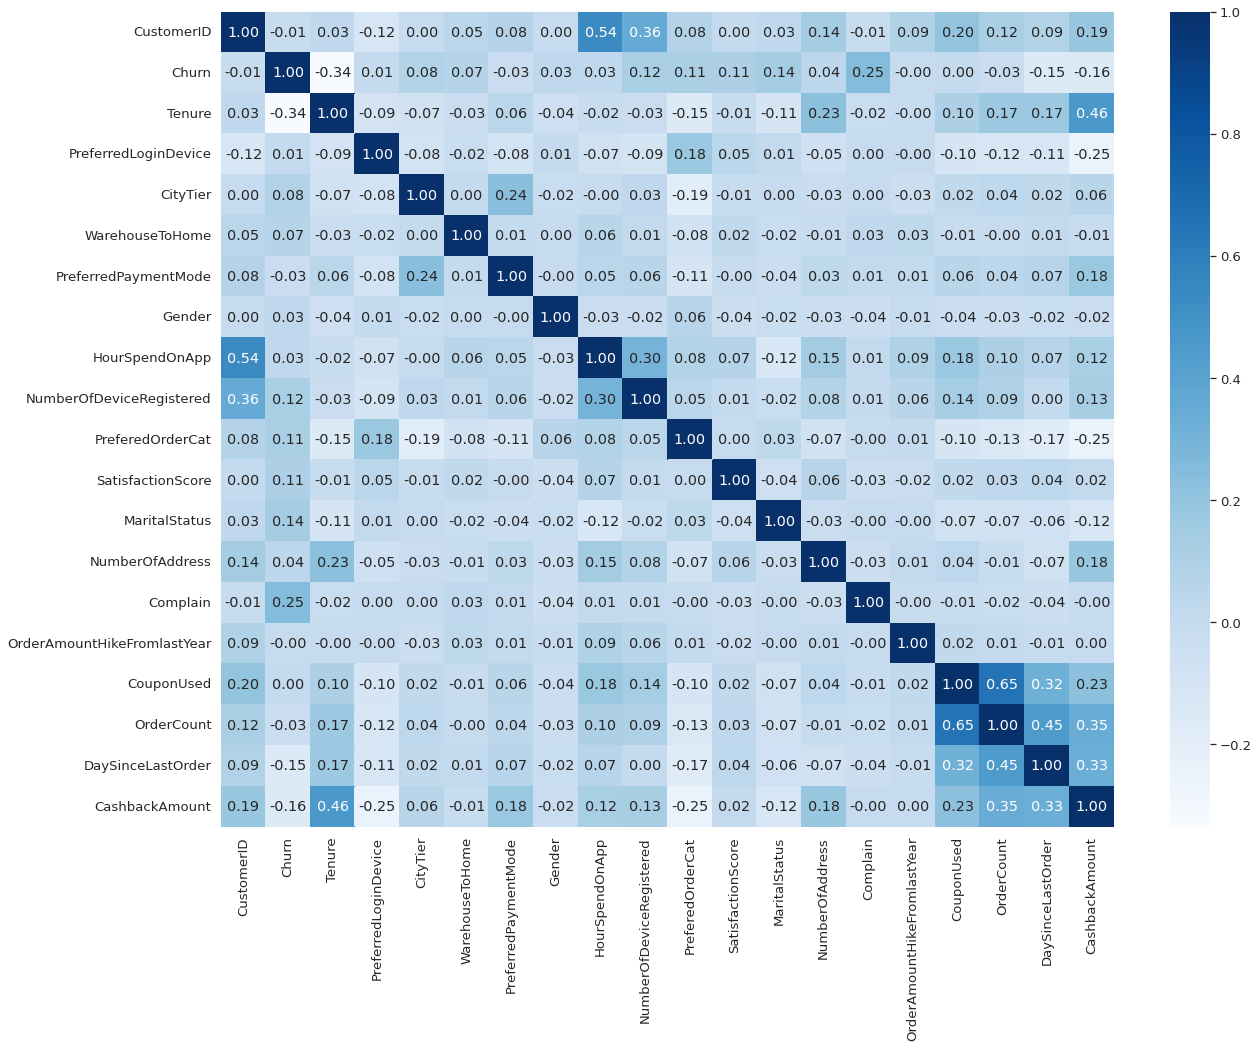

In [86]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(usecase_df.corr(), annot=True, 
            fmt='.2f', cmap='Blues')

## Data Modelling

In [47]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

### Train Test Split

In [87]:
X = usecase_df.drop('Churn', axis=1)
y = usecase_df['Churn']

# split data into train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"""Data Train Size from Feature : {X_train.shape}
Data Train Size from Label : {y_train.shape}
Data Test Size from Feature : {X_test.shape}
Data Test Size from Label : {y_test.shape}""")

Data Train Size from Feature : (3224, 19)
Data Train Size from Label : (3224,)
Data Test Size from Feature : (807, 19)
Data Test Size from Label : (807,)


### Defining Model and Evaluation

Logistic Regression Accuracy : 0.88

Logistic Regression Report :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       679
           1       0.69      0.46      0.55       128

    accuracy                           0.88       807
   macro avg       0.80      0.71      0.74       807
weighted avg       0.87      0.88      0.87       807




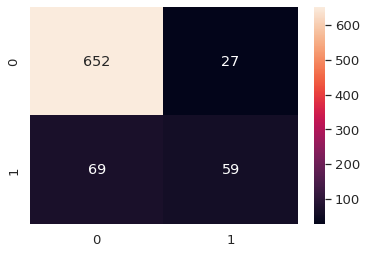

In [88]:
loreg = LogisticRegression(C = 1000, max_iter = 1000)
loreg.fit(X_train, y_train)
lrg_pred = loreg.predict(X_test)

# model accuracy
lr_accuracy = accuracy_score(y_test, lrg_pred)
print(f'Logistic Regression Accuracy : {lr_accuracy:.2f}\n')

# classification Report
lr_clr = classification_report(y_test, lrg_pred)
print(f'Logistic Regression Report :\n {lr_clr}\n')

# logistic regression
lr_cm = confusion_matrix(y_test, lrg_pred)
sns.set(font_scale = 1.2)
sns.heatmap(lr_cm, annot = True,fmt = 'd')

Logistic Regression Accuracy : 0.93

Logistic Regression Report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       679
           1       0.78      0.78      0.78       128

    accuracy                           0.93       807
   macro avg       0.87      0.87      0.87       807
weighted avg       0.93      0.93      0.93       807




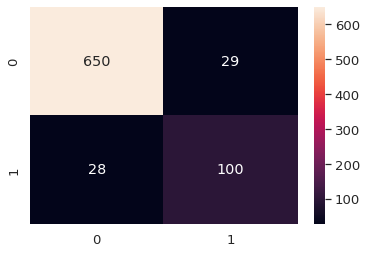

In [89]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

# model accuracy
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print(f'Logistic Regression Accuracy : {dtree_accuracy:.2f}\n')

# classification Report
dtree_clr = classification_report(y_test, dtree_pred)
print(f'Logistic Regression Report :\n {dtree_clr}\n')

# logistic regression
dtree_cm = confusion_matrix(y_test, dtree_pred)
sns.set(font_scale = 1.2)
sns.heatmap(dtree_cm, annot = True,fmt = 'd')

Logistic Regression Accuracy : 0.95

Logistic Regression Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       679
           1       0.90      0.80      0.85       128

    accuracy                           0.95       807
   macro avg       0.93      0.89      0.91       807
weighted avg       0.95      0.95      0.95       807




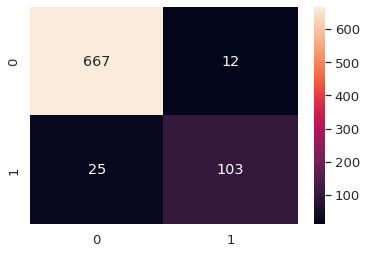

In [90]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# model accuracy
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print(f'Logistic Regression Accuracy : {rfc_accuracy:.2f}\n')

# classification Report
rfc_clr = classification_report(y_test, rfc_pred)
print(f'Logistic Regression Report :\n {rfc_clr}\n')

# logistic regression
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.set(font_scale = 1.2)
sns.heatmap(rfc_cm, annot = True,fmt = 'd')

Logistic Regression Accuracy : 0.87

Logistic Regression Report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       679
           1       0.65      0.40      0.49       128

    accuracy                           0.87       807
   macro avg       0.77      0.68      0.71       807
weighted avg       0.85      0.87      0.86       807




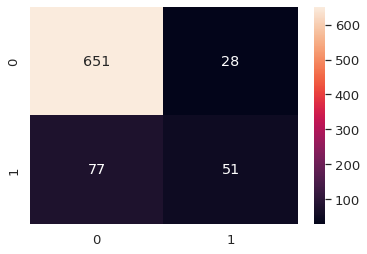

In [91]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

# model accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'Logistic Regression Accuracy : {knn_accuracy:.2f}\n')

# classification Report
knn_clr = classification_report(y_test, knn_pred)
print(f'Logistic Regression Report :\n {knn_clr}\n')

# logistic regression
knn_cm = confusion_matrix(y_test, knn_pred)
sns.set(font_scale = 1.2)
sns.heatmap(knn_cm, annot = True,fmt = 'd')

Logistic Regression Accuracy : 0.91

Logistic Regression Report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       679
           1       0.78      0.59      0.68       128

    accuracy                           0.91       807
   macro avg       0.86      0.78      0.81       807
weighted avg       0.90      0.91      0.90       807




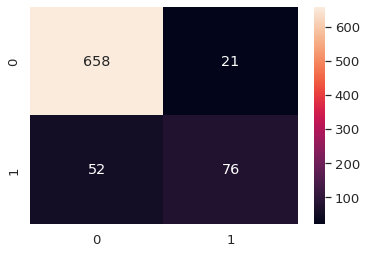

In [94]:
Xgbc = XGBClassifier()
Xgbc.fit(X_train, y_train)
Xgb_pred = Xgbc.predict(X_test)

# model accuracy
Xgb_accuracy = accuracy_score(y_test, Xgb_pred)
print(f'Logistic Regression Accuracy : {Xgb_accuracy:.2f}\n')

# classification Report
Xgb_clr = classification_report(y_test, Xgb_pred)
print(f'Logistic Regression Report :\n {Xgb_clr}\n')

# logistic regression
Xgb_cm = confusion_matrix(y_test, Xgb_pred)
sns.set(font_scale = 1.2)
sns.heatmap(Xgb_cm, annot = True,fmt = 'd')

### Feature Importances 

In [95]:
importances = rfc.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(18):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Tenure,0.210502
1,WarehouseToHome,0.068776
2,Complain,0.063887
3,NumberOfAddress,0.063320
4,CustomerID,0.062824
5,DaySinceLastOrder,0.062281
6,OrderAmountHikeFromlastYear,0.054941
7,SatisfactionScore,0.044620
8,PreferredPaymentMode,0.037956
9,PreferedOrderCat,0.035346


Visualize the Feature Importance

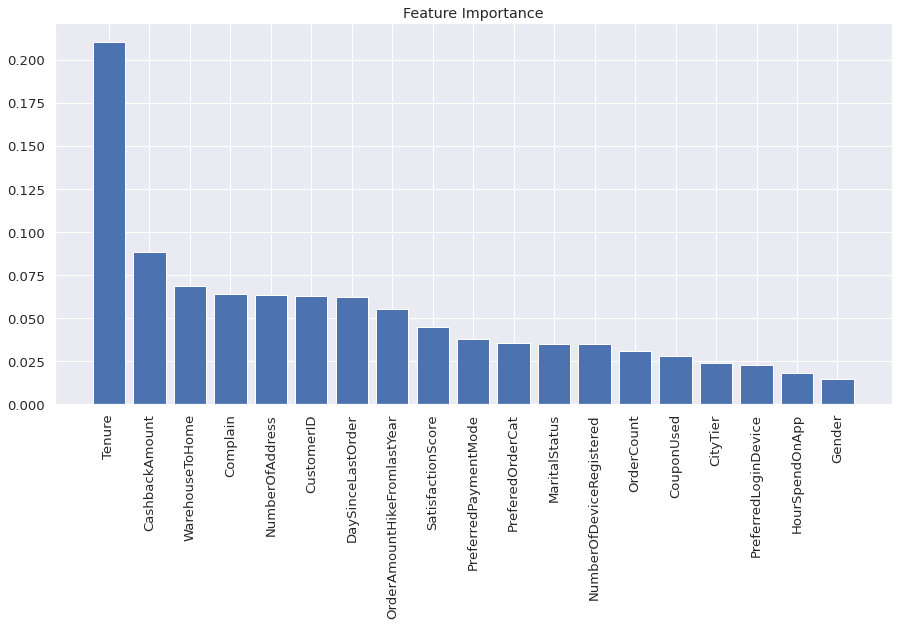

In [96]:
importances = rfc.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices] 

# Create plot
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Model Inference

In [97]:
realcase_df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4030,54031,10.0,Mobile Phone,3,17.0,COD,Female,4.0,5,Laptop & Accessory,3,Married,3,1,14.0,2.0,2.0,8.0,182
4031,54032,5.0,Mobile Phone,1,27.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Married,3,0,12.0,1.0,2.0,3.0,167
4032,54033,8.0,Mobile Phone,3,11.0,Debit Card,Male,4.0,4,Fashion,1,Married,4,1,14.0,1.0,2.0,NaN,222
4033,54034,3.0,Phone,1,14.0,Debit Card,Male,3.0,4,Mobile Phone,5,Single,5,0,15.0,1.0,2.0,3.0,146
4034,54035,11.0,Mobile Phone,1,14.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Married,7,1,23.0,1.0,2.0,5.0,168


In [98]:
# check informasi data dari data realcase
realcase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 4030 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   1600 non-null   int64  
 1   Tenure                       1600 non-null   float64
 2   PreferredLoginDevice         1600 non-null   object 
 3   CityTier                     1600 non-null   int64  
 4   WarehouseToHome              1600 non-null   float64
 5   PreferredPaymentMode         1600 non-null   object 
 6   Gender                       1600 non-null   object 
 7   HourSpendOnApp               1600 non-null   float64
 8   NumberOfDeviceRegistered     1600 non-null   int64  
 9   PreferedOrderCat             1600 non-null   object 
 10  SatisfactionScore            1600 non-null   int64  
 11  MaritalStatus                1600 non-null   object 
 12  NumberOfAddress              1600 non-null   int64  
 13  Complain       

In [99]:
# check jumlah baris dan kolom dari data realcase
realcase_df.shape

(1600, 19)

In [100]:
# check missing value 
realcase_df.isnull().sum().sort_values(ascending=False).head(10)

DaySinceLastOrder              134
OrderAmountHikeFromlastYear    108
OrderCount                      85
CouponUsed                      51
CustomerID                       0
SatisfactionScore                0
Complain                         0
NumberOfAddress                  0
MaritalStatus                    0
PreferedOrderCat                 0
dtype: int64

### Real Dataset Encoding before Applied

In [101]:
# melakukan pengisian null value dengan nilai mean
for i in realcase_df.columns:
    if realcase_df[i].isnull().sum() > 0:
        realcase_df[i].fillna(realcase_df[i].mean(),inplace=True)

In [102]:
# check nilai null setelah pengisian
realcase_df.isnull().sum()

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [103]:
# check duplicate value
realcase_df[realcase_df.duplicated()].count()

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Real Dataset Encoding Before Applying

In [104]:
X_real = realcase_df.copy()

# encoding semua kolom kategorikal
for col in X_real.columns:
    # kalau kolom numerik, ga diapa2in
    if X_real[col].dtype == np.number:
        continue
    # kalau kolom kategorikal, encode dengan label encoder
    X_real[col] = label_encoder.fit_transform(X_real[col])

# for col in num_col:
for col in numeric_columns:
    X_real[col] = X_real[col].astype(float)
    X_real[[col]] = minmax_scaler.fit_transform(X_real[[col]])

X_real.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4030,0.000000,0.150000,1,1.0,0.090909,0,0,0.75,0.666667,2,0.333333,0,0.111111,1.0,0.142857,0.066667,0.0,0.233333,0.284091
4031,0.000625,0.066667,1,0.0,0.173554,3,1,0.50,0.333333,2,0.333333,0,0.111111,0.0,0.000000,0.000000,0.0,0.066667,0.198864
4032,0.001251,0.116667,1,1.0,0.041322,3,1,0.75,0.333333,0,0.000000,0,0.222222,1.0,0.142857,0.000000,0.0,0.135334,0.505682
4033,0.001876,0.033333,2,0.0,0.066116,3,1,0.50,0.333333,4,1.000000,1,0.333333,0.0,0.214286,0.000000,0.0,0.066667,0.079545
4034,0.002502,0.166667,1,0.0,0.066116,2,1,0.75,0.333333,2,1.000000,0,0.555556,1.0,0.785714,0.000000,0.0,0.133333,0.204545


### Applying Model

In [105]:
churn_predict = rfc.predict(X_real)
churn_predict[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Prediction Result

In [107]:
realcase_df['Churn'] = churn_predict
realcase_df.head(20)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
4030,54031,10.0,Mobile Phone,3,17.0,COD,Female,4.0,5,Laptop & Accessory,3,Married,3,1,14.00000,2.0,2.000000,8.000000,182,0
4031,54032,5.0,Mobile Phone,1,27.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Married,3,0,12.00000,1.0,2.000000,3.000000,167,1
4032,54033,8.0,Mobile Phone,3,11.0,Debit Card,Male,4.0,4,Fashion,1,Married,4,1,14.00000,1.0,2.000000,5.060027,222,1
4033,54034,3.0,Phone,1,14.0,Debit Card,Male,3.0,4,Mobile Phone,5,Single,5,0,15.00000,1.0,2.000000,3.000000,146,1
4034,54035,11.0,Mobile Phone,1,14.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Married,7,1,23.00000,1.0,2.000000,5.000000,168,1
4035,54036,9.0,Mobile Phone,1,23.0,UPI,Female,3.0,5,Laptop & Accessory,4,Married,2,1,12.00000,2.0,2.000000,3.000000,173,1
4036,54037,19.0,Mobile Phone,1,32.0,Debit Card,Female,4.0,5,Laptop & Accessory,1,Married,2,0,14.00000,1.0,4.000000,9.000000,184,1
4037,54038,10.0,Computer,2,9.0,UPI,Male,4.0,5,Laptop & Accessory,1,Single,3,0,22.00000,2.0,2.000000,9.000000,164,1
4038,54039,14.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,4,Grocery,5,Married,4,0,16.25134,10.0,12.000000,17.000000,293,1
4039,54040,1.0,Mobile Phone,1,7.0,Debit Card,Female,3.0,5,Mobile Phone,3,Married,3,1,14.00000,1.0,2.000000,1.000000,154,1


In [108]:
# lihat masing-masing jumlah value dari label
realcase_df['Churn'].value_counts()

0    1414
1     186
Name: Churn, dtype: int64

In [110]:
# hitung persentase dari jumlah label secara keseluruhan
retained = realcase_df[realcase_df['Churn'] == 0].shape[0]
churned = realcase_df[realcase_df['Churn'] == 1].shape[0]

print(f"""retained percentage : {(retained / (retained+churned))*100:.2f} %
churned percentatge : {(churned / (retained+churned))*100:.2f} %""")

retained percentage : 88.38 %
churned percentatge : 11.62 %


Text(0.5, 1.0, 'Churned Customer Predicted')

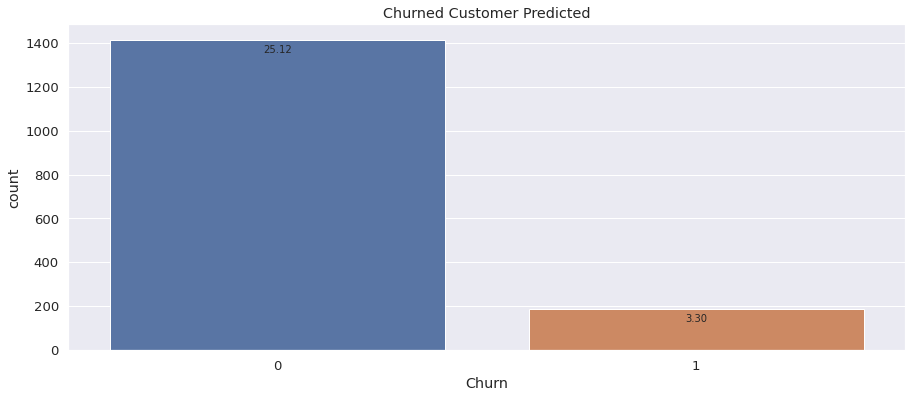

In [112]:
# visualsiasi value count tiap kolom kategorikal
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Churn', data=realcase_df)
# buat anotasi dengan ax.patches
for pat in ax.patches:
    ax.annotate(format((pat.get_height()/5630)*100,'.2f'), (pat.get_x() + pat.get_width()/2., pat.get_height()),\
                ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
plt.title('Churned Customer Predicted')